In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../data/credit_risk_dataset.csv')
df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32055,37,74400,OWN,21.0,VENTURE,A,7500,7.05,0,0.10,N,14
7603,24,54000,MORTGAGE,5.0,VENTURE,A,4000,5.42,0,0.07,N,2
21267,30,20000,RENT,14.0,MEDICAL,D,5400,14.61,0,0.27,Y,7
18436,27,81500,RENT,2.0,HOMEIMPROVEMENT,E,20000,17.51,1,0.25,Y,8
18411,29,77625,RENT,1.0,DEBTCONSOLIDATION,B,20000,11.11,0,0.26,N,9


### Column Description:

    person_age: Age of the individual applying for the loan.
    person_income: Annual income of the individual.
    person_home_ownership: Type of home ownership of the individual.
        rent: The individual is currently renting a property.
        mortgage: The individual has a mortgage on the property they own.
        own: The individual owns their home outright.
        other: Other categories of home ownership that may be specific to the dataset.
    person_emp_length: Employment length of the individual in years.
    loan_intent: The intent behind the loan application.
    loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
        A: The borrower has a high creditworthiness, indicating low risk.
        B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
        C: The borrower's creditworthiness is moderate.
        D: The borrower is considered to have higher risk compared to previous grades.
        E: The borrower's creditworthiness is lower, indicating a higher risk.
        F: The borrower poses a significant credit risk.
        G: The borrower's creditworthiness is the lowest, signifying the highest risk.
    loan_amnt: The loan amount requested by the individual.
    loan_int_rate: The interest rate associated with the loan.
    loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
        0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
        1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
    loan_percent_income: The percentage of income represented by the loan amount.
    cb_person_default_on_file: Historical default of the individual as per credit bureau records.
        Y: The individual has a history of defaults on their credit file.
        N: The individual does not have any history of defaults.
    cb_preson_cred_hist_length: The length of credit history for the individual.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [53]:
# discriptive analysis
df.describe(include=[np.int64, np.float64]).style.background_gradient(cmap= "Wistia", axis= 1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,66074.848470,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,61983.119168,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6000000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


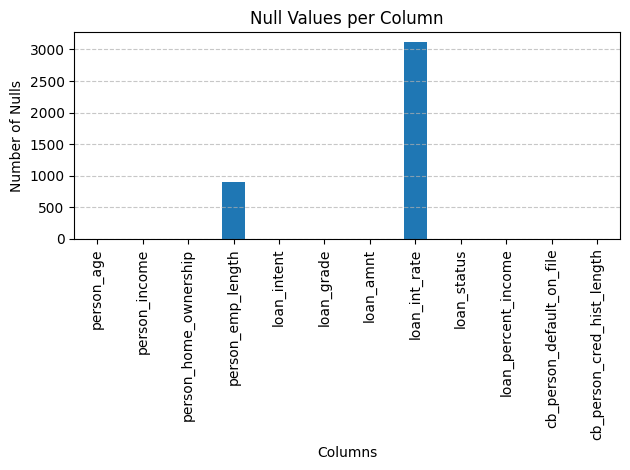

In [33]:
# Null value analysis
null_counts = df.isnull().sum()

# Plot bar chart
null_counts.plot(kind='bar')
plt.title('Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

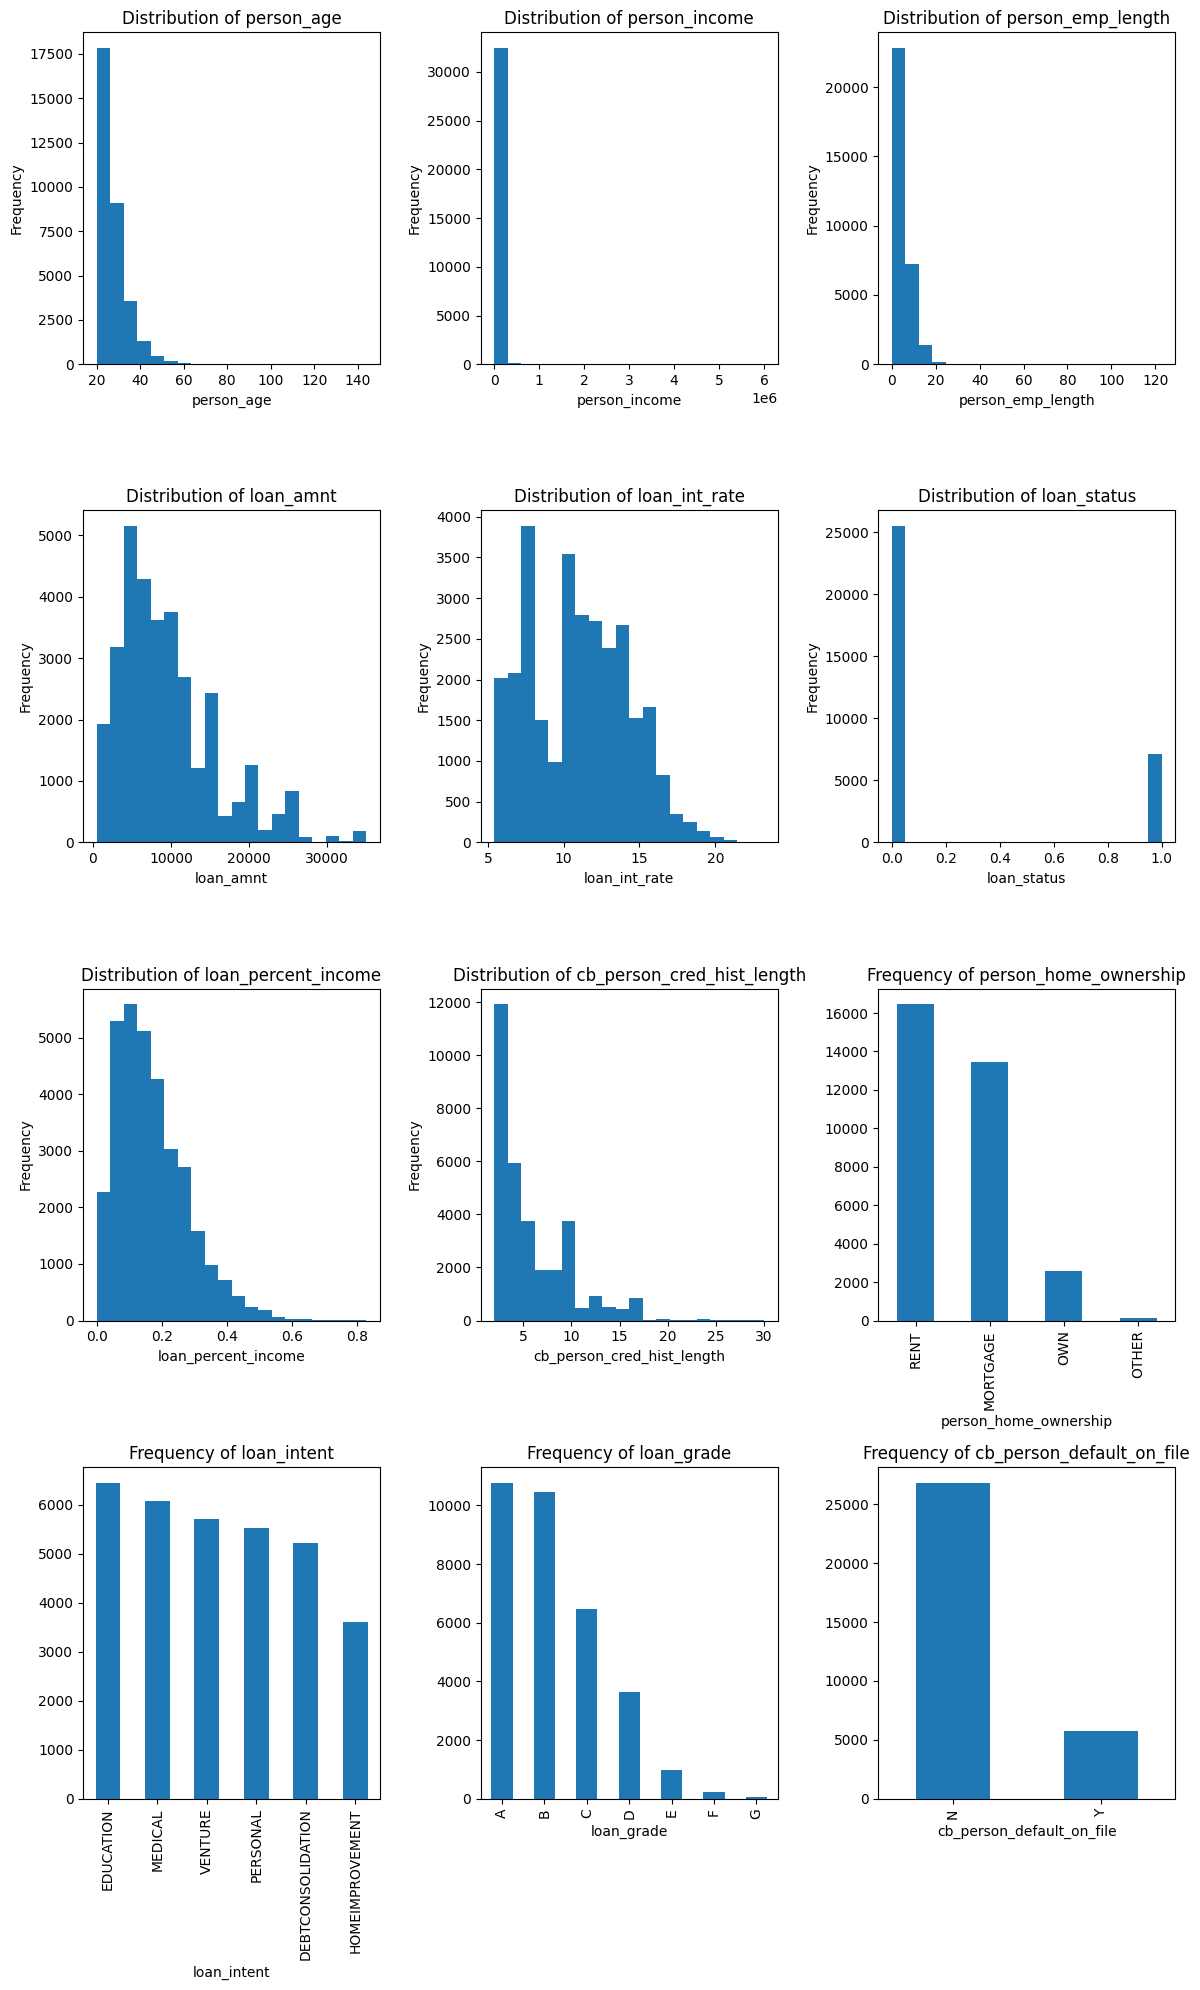

In [36]:
# Identify columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Total number of plots
total_cols = len(numeric_cols) + len(categorical_cols)
cols_per_row = 3
rows = (total_cols + cols_per_row - 1) // cols_per_row

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 5 * rows) )
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot numeric columns as histograms
for i, col in enumerate(numeric_cols):
    df[col].plot(kind='hist', bins=20, ax=axes[i], title=f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Plot categorical columns as bar charts
for j, col in enumerate(categorical_cols, start=len(numeric_cols)):
    df[col].value_counts().plot(kind='bar', ax=axes[j], title=f'Frequency of {col}')
    axes[j].set_xlabel(col)

# Hide any unused subplots
for k in range(total_cols, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.show()

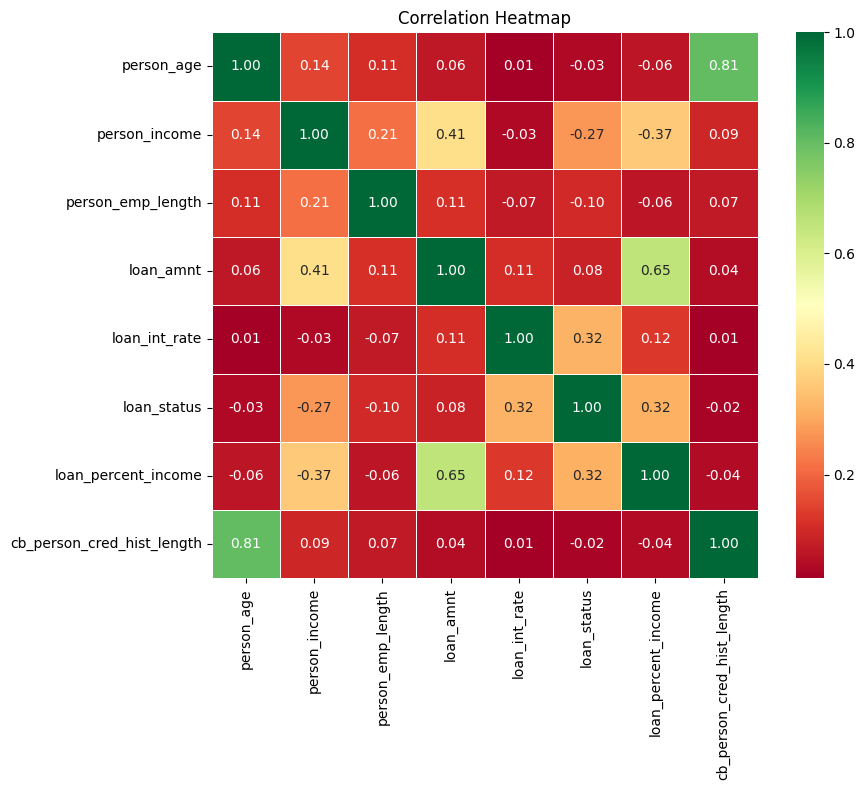

In [62]:
corr = df.corr(method='spearman',numeric_only= True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr.abs(), annot=corr.round(2), cmap='RdYlGn', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()